In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import glob
import json
import torch
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pgf import FigureCanvasPgf
from matplotlib import pyplot as plt
%matplotlib inline

import tsvar
tsvar.plotting.set_neurips_matplotib_rcparams()

In [3]:
EXP_DIR = "../output/dimRegime-5"
output_df = tsvar.plotting.load_outputs(exp_dir=EXP_DIR)
cols = [col for col in output_df.columns if col.startswith('mle')]

Process file: ../output/dimRegime-5/1590697291-g02-d50-n500000/output-01.json...


In [4]:
def build_Id(row):
    return os.path.join(os.path.split(row['expId'])[1], row['outputIdx'])
output_df['Id'] = output_df.apply(build_Id, axis=1)

print(output_df.shape)
output_df.head()

(168, 39)


,mle_baseline,mle_beta,mle_adjacency,mle_conv,mle_history,mle_num_iter,bbvi_loc,bbvi_log_scale,bbvi_coeffs_mean,bbvi_coeffs_mode,...,outputIdx,dim_o,baseline,beta,adjacency,dim,max_jumps,sim_seed_list,gen_seed,Id
0,"[0.3713181986197834, 0.3813487458833793, 0.019...","[[1.5171843821528346, 1.8531080370869526, 0.46...","[[1e-10, 1e-10, 0.15674265124803155, 1e-10, 1e...",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",3500,"[-3.5993590354919434, -3.263768196105957, -3.6...","[-3.311981201171875, -3.5071330070495605, -3.0...","[0.027359404369453656, 0.038261209094900286, 0...","[0.027304952218375866, 0.03820965061011247, 0....",...,output-00.json,5,"[0.024, 0.0331, 0.0149, 0.0235, 0.0249]","[[0.0707, 0.2669, 0.4073, 0.7475, 0.9723], [0....","[[0.1403, 0.1639, 0.1428, 0.1062, 0.0], [0.0, ...",5,50000,"[1633236564, 2118749951, 1947531723, 752426828]",967567147,1590697275-g00-d05-n050000/output-00.json
1,"[0.4843596909891997, 0.03307358014121794, 0.48...","[[0.8723631094394336, 0.16436517658106298, 1.7...","[[1e-10, 0.1578629058589806, 1e-10, 1e-10, 1e-...",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",2400,"[-3.440060615539551, -3.206223249435425, -4.27...","[-3.3931424617767334, -3.6683592796325684, -2....","[0.03208084879639017, 0.04052250997107021, 0.0...","[0.03202655836697523, 0.040482947890380594, 0....",...,output-01.json,5,"[0.024, 0.0331, 0.0149, 0.0235, 0.0249]","[[0.0707, 0.2669, 0.4073, 0.7475, 0.9723], [0....","[[0.1403, 0.1639, 0.1428, 0.1062, 0.0], [0.0, ...",5,50000,"[1633236564, 2118749951, 1947531723, 752426828]",967567147,1590697275-g00-d05-n050000/output-01.json
2,"[0.571881576130403, 0.43243257049878236, 0.724...","[[3.0233349589719105, 2.0896891630950734, 2.50...","[[1e-10, 1e-10, 1e-10, 0.08090752007732734, 1e...",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",2600,"[-3.5734407901763916, -3.239877223968506, -3.6...","[-3.2664976119995117, -3.6382153034210205, -3....","[0.028079557204844282, 0.03918225163993569, 0....","[0.028018355430008284, 0.03914162211702551, 0....",...,output-02.json,5,"[0.024, 0.0331, 0.0149, 0.0235, 0.0249]","[[0.0707, 0.2669, 0.4073, 0.7475, 0.9723], [0....","[[0.1403, 0.1639, 0.1428, 0.1062, 0.0], [0.0, ...",5,50000,"[1633236564, 2118749951, 1947531723, 752426828]",967567147,1590697275-g00-d05-n050000/output-02.json
3,"[0.020660006766004047, 0.02607445875786398, 0....","[[1e-10, 0.5286906880829361, 0.486034542094672...","[[0.13539323328800398, 0.19657069796787263, 0....",False,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",20000,"[-3.7119157314300537, -3.3845784664154053, -4....","[-3.2542450428009033, -3.415938138961792, -2.7...","[0.024448892344247162, 0.03391021269922776, 0....","[0.024394283416832172, 0.03385538194073589, 0....",...,output-03.json,5,"[0.024, 0.0331, 0.0149, 0.0235, 0.0249]","[[0.0707, 0.2669, 0.4073, 0.7475, 0.9723], [0....","[[0.1403, 0.1639, 0.1428, 0.1062, 0.0], [0.0, ...",5,50000,"[1633236564, 2118749951, 1947531723, 752426828]",967567147,1590697275-g00-d05-n050000/output-03.json
4,"[0.029776449747017392, 0.010294526707256512, 0...","[[0.5592430530943593, 0.3493233232910221, 0.00...","[[0.008289701141699362, 0.14528122633187046, 0...",False,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",20000,"[-3.2700741291046143, -4.158210277557373, -2.8...","[-3.3769543170928955, -2.850595235824585, -4.0...","[0.03802577829372861, 0.01566166479561597, 0.0...","[0.037959311568342216, 0.015583349692844835, 0...",...,output-00.json,5,"[0.0265, 0.0104, 0.0478, 0.0463, 0.0229]","[[0.9769, 0.1822, 0.2742, 0.649, 0.8892], [0.9...","[[0.0, 0.1459, 0.1385, 0.0, 0.124], [0.1878, 0...",5,50000,"[1356435138, 1019291352, 1784479631, 2142128613]",1211688996,1590697275-g01-d05-n050000/output-00.json


---

In [89]:
suf_col_dict = {
    'mle': 'mle_adjacency', 
    
    'bbvi': 'bbvi_adj_mean', 
    #'bbvi': 'bbvi_adj_mode',
    
    'vi': 'vi_adj_mean',
    #'vi': 'vi_adj_mode',
    
    #'vi_fixed_beta_mean': 'vi_fixed_beta_adj_mean',
    #'vi_fixed_beta_mode': 'vi_fixed_beta_adj_mode',
    
    'gb': 'gb_adj_normed',
}

plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col='dim', threshold=0.05)
plot_df

acc_mle                                      acc_bbvi                                      ... fn_vi                                fn_gb                                  
          min       max      mean       std count       min       max      mean       std count  ...   min max       mean       std count   min  max        mean        std count
dim                                                                                              ...                                                                             
5    0.280000  0.960000  0.596000  0.266249    20  0.960000  1.000000  0.998000  0.008944    20  ...     0   0   0.000000  0.000000    20     0    2    0.900000   0.718185    20
10   0.500000  0.970000  0.722500  0.169826    20  0.980000  1.000000  0.997500  0.005501    20  ...     0   1   0.100000  0.307794    20     2   11    6.550000   2.372540    20
15   0.617778  0.960000  0.744444  0.125538    20  0.982222  1.000000  0.993111  0.005853    20  ...     0   1   0.200000  0.410391    20     9   22   16.200000   3.791958    20
20   0.705000  0.815000  0.748250  0.028724    20  0.977500  0.997500  0.991250  0.005821    20  ...     0   2   0.650000  0.670820    20    23   43   32.650000   5.382965    20
25   0.728000  0.968000  0.801520  0.072900    20  0.977600  1.000000  0.989760  0.006040    20  ...     0   5   1.850000  1.926956    20    31   71   51.100000  11.804994    20
30   0.762222  0.960000  0.814833  0.049942    20  0.983333  0.996667  0.989667  0.004312    20  ...     0   7   2.850000  2.007224    20    50   88   68.900000  11.327191    20
35   0.793469  0.848163  0.812612  0.015850    20  0.982857  0.993469  0.989306  0.002751    20  ...     1   7   3.900000  1.518309    20    77  107   92.750000   8.704959    20
40   0.815000  0.856875  0.833924  0.012170    18  0.975625  0.995625  0.987188  0.005462    18  ...     3  14   8.111111  4.071261    18   105  144  120.722222  12.304019    18
45   0.833086  0.868148  0.852557  0.011848     7  0.985185  0.991605  0.989206  0.002525     7  ...     5  17   9.000000  4.281744     7   128  164  140.714286  11.940328     7
50   0.853200  0.873200  0.862933  0.010011     3  0.986400  0.987600  0.986933  0.000611     3  ...    13  16  14.333333  1.527525     3   172  183  178.666667   5.859465     3

[10 rows x 280 columns]

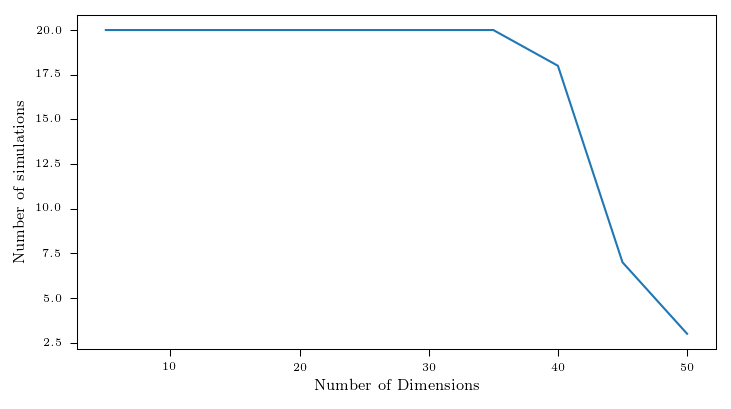

In [90]:
plt.figure()
plt.plot(plot_df.index, plot_df['acc_mle']['count'])
plt.ylabel('Number of simulations')
plt.xlabel('Number of Dimensions');

In [91]:
NEURIPS_RCPARAMS = {
    "figure.autolayout": False,         # Makes sure nothing the feature is neat & tight.
    "figure.figsize": (5.5, 2.95),      # Text width: 5.5in (double figure minus spacing 0.2in).
    "figure.dpi": 150,                  # Displays figures nicely in notebooks.
    "axes.linewidth": 0.5,              # Matplotlib's current default is 0.8.
    "xtick.major.width": 0.5,
    "xtick.minor.width": 0.5,
    "ytick.major.width": 0.5,
    "ytick.minor.width": 0.5,
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",             # use serif rather than sans-serif
    "font.serif": "Times New Roman",    # use "Times New Roman" as the standard font
    "font.size": 7,
    "axes.titlesize": 7,                # LaTeX default is 10pt font.
    "axes.labelsize": 7,                # LaTeX default is 10pt font.
    "legend.fontsize": 6,               # Make the legend/label fonts a little smaller
    "legend.frameon": True,             # Remove the black frame around the legend
    "patch.linewidth": 0.5,
    "xtick.labelsize": 5,
    "ytick.labelsize": 5,
    "lines.linewidth": 1.0,
    "lines.markersize": 4,
    "grid.linewidth": 0.3,
    "pgf.texsystem": "xelatex",         # use Xelatex which is TTF font aware
    "pgf.rcfonts": False,               # Use pgf.preamble, ignore standard Matplotlib RC
    "pgf.preamble": [
        r'\usepackage{fontspec}',
        r'\usepackage{unicode-math}',
        r'\setmainfont{Times New Roman}',
    ],
    'errorbar.capsize': 3.0,
}
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
matplotlib.rcParams.update(NEURIPS_RCPARAMS)

In [93]:
plot_meta_data = [
    ('f1score',  'F1-Score',         ), 
    ('relerr',   'Relative Error',   ),
    ('runtime_log',  'Runtime (in min)', ),
#    ('runtime_lin',  'Runtime (in min)', ),
    
#    ('num_iter', 'Number of iterations'),
    
#    ('precAt5', 'Precision@5',     ),
    ('precAt10', 'Precision@10',     ),
#    ('precAt20', 'Precision@20',     ),
#    ('precAt50', 'Precision@50',     ),
#    ('precAt100', 'Precision@100',     ),
#    ('precAt200', 'Precision@200',     ),
]

#   (prefix, label,  color,  ls,   lw)
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
    ('mle',  'MLE',   'C0', '-',  1.0), 
]

for i, (prefix, ylabel) in enumerate(plot_meta_data):
    print(prefix)
    
    plt.figure(figsize=(5.5/2 - 0.2, 1.25))
    plt.grid()
    
    if prefix == 'runtime_log':
        #ax = plt.gca()
        #new_ax = plt.twinx()
        #plt.sca(new_ax)
        #plt.grid(False)
        pass
    
    for suf, label, color, ls, lw in queries_list:
        col = '_'.join([prefix, suf])
        plt.errorbar(plot_df.index, plot_df[col]['mean'], yerr=plot_df[col]['std'], 
                     label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
                     marker='o', markersize=2*lw)
    
    if prefix == 'runtime_log':
        #plt.yticks([], [])
        #plt.sca(ax)
        pass
    
    plt.xlabel(f'Number of Dimensions $M$', labelpad=0)
    plt.ylabel(ylabel, labelpad=3);
    
    if prefix == 'f1score':
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.legend(loc='lower left', prop={'size': 7})
        plt.ylim(bottom=0)
    
    if prefix == 'relerr':
        plt.grid(which='both', axis='y')
        plt.gca().tick_params(axis='y', which='major', pad=0.5)
        plt.ylabel(ylabel, labelpad=0);
        plt.yscale('log')
        pass
        
    if prefix == 'runtime_log':
        plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
            np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [100, 10, 1, 0.1, 0.01]]))))
        plt.grid(which='both', axis='y')
        
        plt.yticks([-1, 0, 1, 2], [0.1, 1, 10, 100])
        #
        #vals = np.array([10, 50, 100, 150, 200, 250])
        #plt.plot(10 ** plot_df[col]['mean'], lw=0)
        #plt.yscale('log', basey=10, nonposy='clip')
        #plt.yticks(np.log10(vals), vals)
        #plt.gca().tick_params(axis="y",direction="in", pad=-0.1)
        #ymin, ymax = 10 ** np.array(new_ax.get_ylim())
        #plt.ylim(ymin, ymax)
        pass
        
    if prefix.startswith('prec'):
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.ylim(bottom=0)

    if prefix.startswith('num_iter'):
        plt.yscale('log', basey=10, nonposy='clip');
        
    plt.tight_layout()
    plt.subplots_adjust(left=0.15, right=0.99, top=0.97, bottom=0.2)
    plt.savefig(f'/Users/trouleau/Desktop/fig-{EXP_DIR.split(os.path.sep)[-1]}-{prefix}.pdf')
    plt.close()

f1score
relerr
runtime_log
precAt10


---

### Varying threshold

In [41]:
suf_col_dict = {
    'mle': 'mle_adjacency', 
    'bbvi': 'bbvi_adj_mean', 
    'vi': 'vi_adj_mean',
    'gb': 'gb_adj_normed',
}


data_thresh_list = list()
thresh_range = np.linspace(0.0, 0.1, 11)
for thresh in thresh_range:
    print(thresh)
    this_plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col=None, threshold=thresh)
    this_plot_df['threshold'] = thresh
    data_thresh_list.append(this_plot_df.copy())
    
all_df_thresh = pd.concat(data_thresh_list)

# Keep only dim=10
all_df_thresh = all_df_thresh.loc[all_df_thresh['dim'] == 10]
    
plot_df_thresh = all_df_thresh.groupby('threshold').agg(['mean', 'std'])

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1


In [42]:
plot_df_thresh

mle_conv           mle_num_iter              bbvi_conv      vi_conv      gb_conv       ... runtime_log_gb           num_iter_mle              num_iter_bbvi      num_iter_vi            num_iter_gb     
              mean       std         mean          std      mean  std    mean  std    mean  std  ...           mean       std         mean          std          mean  std        mean        std        mean  std
threshold                                                                                        ...                                                                                                              
0.00           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.01           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.02           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.03           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.04           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.05           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.06           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.07           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.08           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.09           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.10           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0

[11 rows x 130 columns]

In [47]:
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
    ('mle',  'MLE',   'C0', '-',  1.0), 
]
prefix = 'f1score'


plt.figure(figsize=(5.5/2 - 0.2, 1.25))
plt.grid()
plt.xlabel(f'Threshold $\eta$', labelpad=0)
plt.ylabel('F1-Score', labelpad=3);
    
for suf, label, color, ls, lw in queries_list:
    col = '_'.join([prefix, suf])

    plt.errorbar(plot_df_thresh[col].index, plot_df_thresh[col]['mean'], yerr=plot_df_thresh[col]['std'], 
                 label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
                 marker='o', markersize=2*lw)

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.legend(loc='lower right', prop={'size': 7})
plt.ylim(bottom=0)

plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.99, top=0.97, bottom=0.2)
plt.savefig(f'/Users/trouleau/Desktop/fig-{EXP_DIR.split(os.path.sep)[-1]}-{prefix}-threshold.pdf')
plt.close()

---

### Numer of iterations

In [58]:
for suf in ['vi', 'gb', 'bbvi', 'mle']:
    output_df[f'num_iter_log_{suf}'] = output_df[f'num_iter_{suf}'].apply(np.log10)

In [63]:
num_iter_cols = [f'num_iter_log_{suf}' for suf in ['vi', 'gb', 'bbvi', 'mle']] 
num_iter_plot_df = output_df[num_iter_cols + ['dim']].groupby('dim').agg(['mean', 'std'])

In [94]:
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
    ('mle',  'MLE',   'C0', '-',  1.0), 
]
prefix = 'num_iter_log'

plt.figure(figsize=(5.5/2 - 0.2, 1.25))
plt.grid()
plt.xlabel(f'Number of dimensions $M$', labelpad=0)
plt.ylabel('Number of iterations \n performed', labelpad=3);
    

for suf, label, color, ls, lw in queries_list:
    col = '_'.join([prefix, suf])
    
    plt.errorbar(num_iter_plot_df[col].index, num_iter_plot_df[col]['mean'], yerr=num_iter_plot_df[col]['std'], 
             label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
             marker='o', markersize=2*lw)
    
    plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
        np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [10000, 1000, 100]]))))
    plt.grid(which='both', axis='y')

    plt.yticks([2, 3, 4], ['$10^1$', '$10^2$', '$10^3$', '$10^4$'])

    
#plt.legend(loc='upper left', prop={'size': 7})
#plt.ylim(bottom=10);

plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.99, top=0.97, bottom=0.2)
plt.savefig(f'/Users/trouleau/Desktop/fig-{EXP_DIR.split(os.path.sep)[-1]}-{prefix}-num-iter.pdf')
plt.close()